In [46]:
import cv2
import tifffile as tiff 
import imagecodecs
import rasterio 
# I also want to try using the gdal library > installed by default on colab server and also usable in QGIS. However trouble installing it locally via pipenv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

img_rgb = cv2.imread("../data/example_tile.tif")
img_rgb.shape


(3000, 4000, 3)

In [6]:
img_rgb = cv2.imread("../data/example_multispectral.tif")
img_rgb.shape
# this does not work > does only read three color bands 

(2984, 3755, 3)

In [110]:
img_ms_tiff = tiff.imread("../data/example_multispectral.tif")
img_ms.shape

(2984, 3755, 4)

In [109]:
img_rededge_tiff = tiff.imread("../data/example_rededge.tif")
img_nir_tiff = tiff.imread("../data/example_nir.tif")
img_red_tiff = tiff.imread("../data/example_red.tif")
img_green_tiff = tiff.imread("../data/example_green.tif")
img_blue_tiff = tiff.imread("../data/example_blue.tif")

def replace_nans(array):

    indis = np.where(np.isnan(array))
    array[indis] = 0
    array = array.astype("uint8")

    return(array)

img_nir_tiff = replace_nans(array=img_nir_tiff)
img_rededge_tiff = replace_nans(array=img_rededge_tiff)
img_red_tiff = replace_nans(array=img_red_tiff)
img_green_tiff = replace_nans(array=img_green_tiff)
img_blue_tiff = replace_nans(array=img_blue_tiff)


In [120]:
#for i in range(0,4):
    #img_ms_tiff[:,:,i].shape == img_red_tiff
print(img_red_tiff[2000, 2000])
print(img_green_tiff[2000, 2000])
print(img_blue_tiff[2000, 2000])
print(img_rededge_tiff[2000, 2000])
print(img_nir_tiff[2000, 2000])

print("complete result values:")

for i in range(0,4):
    print(img_ms_tiff[2000,2000,i])
    


144
142
14
178
206
complete result values:


(array([[2984.,    0.,    0., ...,    0.,    0.,    0.],
        [2984.,    0.,    0., ...,    0.,    0.,    0.],
        [2984.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2984.,    0.,    0., ...,    0.,    0.,    0.],
        [2984.,    0.,    0., ...,    0.,    0.,    0.],
        [2984.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 3755 BarContainer objects>)

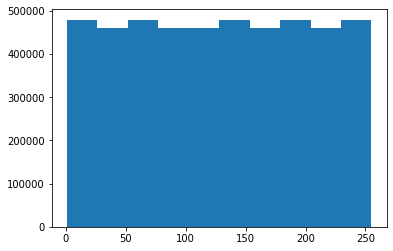

In [127]:
img_red_flat = img_red_tiff.reshape((-1))
img_red_flat = np.float32(img_red_flat)

#plt.figure(figsize=((10,8)))
plt.hist(img_red_flat[img_red_flat != 0])
plt.show()

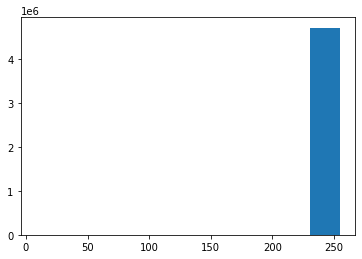

In [131]:
img_ms_flat = dict()
for i in range(0,4):
    img_ms_flat[str(i)] = img_ms_tiff[:,:,i].reshape((-1))

plt.hist(img_ms_flat["3"][img_ms_flat["3"]!=0])
plt.show()

In [132]:
# is the fourth band (index=3) maybe a mask? (ie black and white values only?)
np.unique(img_ms_tiff[:,:,3]) # --> no, but values are very strange?

array([  0,   8,  16, 239, 247, 255], dtype=uint8)

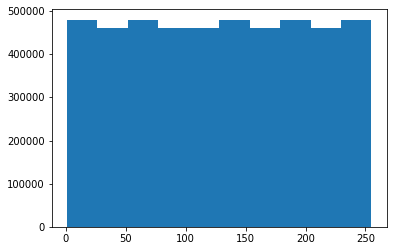

In [133]:
# look at nir and red edge to see how the histograms look like

img_rededge_flat = img_rededge_tiff.reshape((-1))
img_rededge_flat = np.float32(img_rededge_flat)

#plt.figure(figsize=((10,8)))
plt.hist(img_rededge_flat[img_rededge_flat != 0])
plt.show()

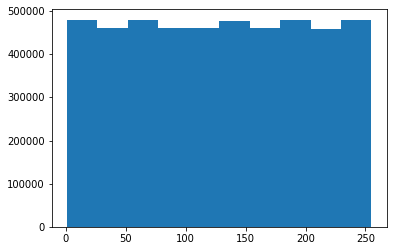

In [135]:
img_nir_flat = img_nir_tiff.reshape((-1))
img_nir_flat = np.float32(img_nir_flat)

#plt.figure(figsize=((10,8)))
plt.hist(img_nir_flat[img_nir_flat != 0])
plt.show()

In [138]:
# die histogramme sehen alle gleich aus! warum??

(img_nir_tiff == img_red_tiff).all() # werte sind schonmal nicht alle gleich (sieht man oben auch schon)

False

In [14]:
img_ms_rasterio = rasterio.open("../data/example_multispectral.tif").read()
img_ms_rasterio.shape
# calculate indices directly in python, see https://gis.stackexchange.com/questions/379762/how-to-calculate-multispectral-vegetation-indices-using-python

# this package makes the best impression. well documented, easy to use but powerful

# is there maybe a difference in what the different raster packages produce when importing data?

(4, 2984, 3755)